## 1. Data

In [83]:
from matplotlib import pyplot as plt
import numpy as np
from torchvision import transforms, datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),  # mean value = 0.1307, standard deviation value = 0.3081
])

In [57]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=True, download=False, transform=transforms.ToTensor()),
    batch_size = batch_size, shuffle=True)

In [58]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=False, transform=transforms.ToTensor()),
    batch_size= batch_size)

## 2. Model

In [59]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Sigmoid(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        ) 
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        ) 
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        out = self.classifier3(x)              # [batchSize, 10]
        
        return out

net = classification()
net

classification(
  (classifier1): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Sigmoid()
  )
  (classifier2): Sequential(
    (0): Linear(in_features=400, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (classifier3): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): LogSoftmax(dim=1)
  )
)

## 3. 학습

In [61]:
learning_rate_value = 0.01

In [62]:
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate_value)

In [52]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 8 %


In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [70]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Sigmoid(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        ) 
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        ) 
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        out = self.classifier3(x)              # [batchSize, 10]
        
        return out

model = classification()
model

classification(
  (classifier1): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Sigmoid()
  )
  (classifier2): Sequential(
    (0): Linear(in_features=400, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (classifier3): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): LogSoftmax(dim=1)
  )
)

In [71]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=True, download=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)

In [73]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=False, transform=transforms.ToTensor()),
    batch_size=1000)

In [74]:
for p in model.parameters():
    print(p.size())

torch.Size([400, 784])
torch.Size([400])
torch.Size([100, 400])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [75]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [78]:
model.train()
train_loss = []
train_accu = []
i = 0
for epoch in range(15):
    for data, target in train_loader:
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()    # calc gradients
        train_loss.append(loss.data)
        optimizer.step()   # update gradients
        prediction = output.data.max(1)[1]   # first column has actual prob.
        accuracy = prediction.eq(target.data).sum()/batch_size*100
        train_accu.append(accuracy)
        if i % 1000 == 0:
            print('Train Step: {}\tLoss: {:.3f}\tAccuracy: {:.3f}'.format(i, loss.data, accuracy))
        i += 1

Train Step: 0	Loss: 2.330	Accuracy: 18.750
Train Step: 1000	Loss: 2.300	Accuracy: 12.500
Train Step: 2000	Loss: 2.292	Accuracy: 12.500
Train Step: 3000	Loss: 2.271	Accuracy: 34.375
Train Step: 4000	Loss: 2.267	Accuracy: 12.500
Train Step: 5000	Loss: 2.182	Accuracy: 21.875
Train Step: 6000	Loss: 1.899	Accuracy: 43.750
Train Step: 7000	Loss: 1.404	Accuracy: 56.250
Train Step: 8000	Loss: 1.420	Accuracy: 53.125
Train Step: 9000	Loss: 1.155	Accuracy: 65.625
Train Step: 10000	Loss: 0.895	Accuracy: 75.000
Train Step: 11000	Loss: 0.908	Accuracy: 81.250
Train Step: 12000	Loss: 0.982	Accuracy: 68.750
Train Step: 13000	Loss: 0.755	Accuracy: 75.000
Train Step: 14000	Loss: 0.466	Accuracy: 93.750
Train Step: 15000	Loss: 0.731	Accuracy: 78.125
Train Step: 16000	Loss: 0.402	Accuracy: 93.750
Train Step: 17000	Loss: 0.504	Accuracy: 96.875
Train Step: 18000	Loss: 0.398	Accuracy: 90.625
Train Step: 19000	Loss: 0.315	Accuracy: 93.750
Train Step: 20000	Loss: 0.604	Accuracy: 81.250
Train Step: 21000	Loss: 0.

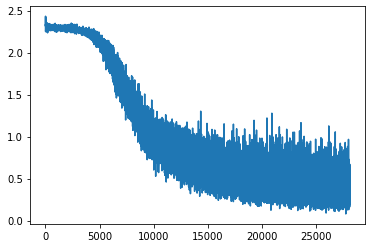

In [84]:
plt.plot(np.arange(len(train_loss)), train_loss)